# Decision Tree

## About the algorithm

### Working
    1. Entropy: It defines the impurity in the dataset class. It is in range(0,1). If Entropy = 1, the dataset have 50:50 classes. If Entropy = 0, dataset have pure classed.
		      Entropy(S) = ∑ – p(I) . log2p(I)
    2. Information gain: Defines the how good the dataset can be classified using the attribute X. More is the information easier it is to classify.
		      Gain(S, A) = Entropy(S) – ∑ [ p(S|A) . Entropy(S|A) ]
    3. ID3 Algorithm:
        1. Calculate entropy of the target. 
        2. The dataset is then split on the different attributes. The entropy for each branch is calculated. Then it is added proportionally, to get total entropy for the split. The resulting entropy is subtracted from the entropy before the split. The result is the Information Gain, or decrease in entropy. 
        3. Choose attribute with the largest information gain as the decision node, divide the dataset by its branches and repeat the same process on every branch.
        4. A branch with entropy of 0 is a leaf node. Or A branch with entropy more than 0 needs further splitting.
        5.The ID3 algorithm is run recursively on the non-leaf branches, until all data is classified

          
### Pros

    1. Generates understandable rules.
    2. Less computation.
    3. Works on continuous and categorical variables.
    4. Clear indication of which fields are most important for prediction or classification.

### Cons

    1. Overfitting
    2. Fails if the datset is small
    3. Computationlly expenssive.

## About Notebook

### Problem statement
    Classify the Wheat seeds into its respective group based the input feature using Decision Tree.
    
### About Dataset
    1. Dataset have 7 attributes and its respective classes. Measurements of geometrical properties of kernels belonging to three different varieties of wheat.
    2. It contains 210 data points without null values.
    3. Attributes:
        1. A = Area
        2. P =Perimeter
        3. C = compactness (C = 4piA/P^2)
        4. LK = Length of Kernel
        5. WK = Width of Kernel
        6. A_Coef = Asymmetry coefficient
        7. LKG = Length of the Kernel.
        8. Target: Kama=0, Rosa=1 and Canadian=2

### What is done
    1. Necessary modules are imported.
    2. Data is loaded using pandas and verified the same
    3. Data is checked for null values, correlation and other basic statistical details.
    4. Data is divided into independent and target dataset.
    5. Data is split into training and testing dataset.
    6. Model us trained and tested for accuracy using confusion matrix.
    7. Tree is visualised using pyplot

### Output Interpretation
    1. Accuracy can be evaluated using confusion matrix. Which is a square matrix and its size depends on number of Classed
    2. Important Terminologies
        1. TN / True Negative: when a case was negative and predicted negative
        2. TP / True Positive: when a case was positive and predicted positive
        3. FN / False Negative: when a case was positive but predicted negative
        4. FP / False Positive: when a case was negative but predicted positive.
    3. Precession:
        1. Describes what percentage of your prediction were correct
        2. Precession = TP/(TP+FP)
    4. Recall:
        1. Describes what percentage of the positive cases did you catch.
        2. Recall = TP/(TP+FN)
    5. F1 Score
        1. Describe what percentage of the positive prediction were correct
        2. F1 Score = s((Recall*Precession)/(Recall+Precession))

In [1]:
import pandas as pa
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#data is loaded
url = 'https://raw.githubusercontent.com/iamchiragshekars/Machine-Learning/master/Datasets/Seed_Data.csv'
dataset = pa.read_csv(url,error_bad_lines=True)
dataset.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [3]:
#basic information of the dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
A         210 non-null float64
P         210 non-null float64
C         210 non-null float64
LK        210 non-null float64
WK        210 non-null float64
A_Coef    210 non-null float64
LKG       210 non-null float64
target    210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [4]:
#statistical information
dataset.describe()

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


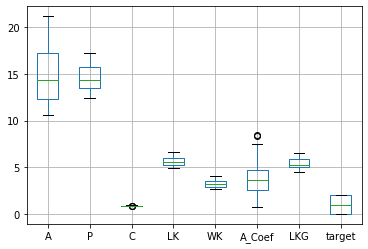

In [5]:
#looking for outliers
dataset.boxplot()

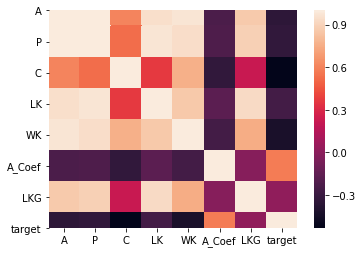

In [6]:
#correltaion
sns.heatmap(dataset.corr(),square=True)

In [7]:
#correlation
dataset.corr()

,A,P,C,LK,WK,A_Coef,LKG,target
A,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
P,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
C,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
LK,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
WK,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
A_Coef,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
LKG,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
target,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


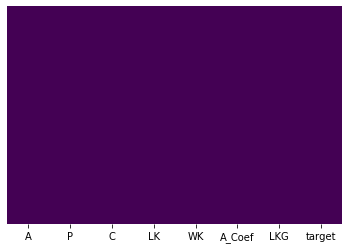

In [8]:
#check for null values
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
#spliting data is independent and dependent dataset
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1:]

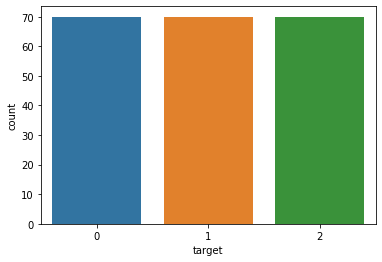

In [12]:
#count of data points in each class
sns.countplot(x='target', data=dataset)

In [13]:
#dividing the dataset into testing and training dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [14]:
#training the model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
#predecting the model
y_pred = classifier.predict(X_test)

In [16]:
#Verifying the accuracy using confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  1  1]
 [ 1 14  0]
 [ 1  0 11]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.93      0.93      0.93        15
           2       0.92      0.92      0.92        12

    accuracy                           0.90        42
   macro avg       0.91      0.91      0.91        42
weighted avg       0.90      0.90      0.90        42



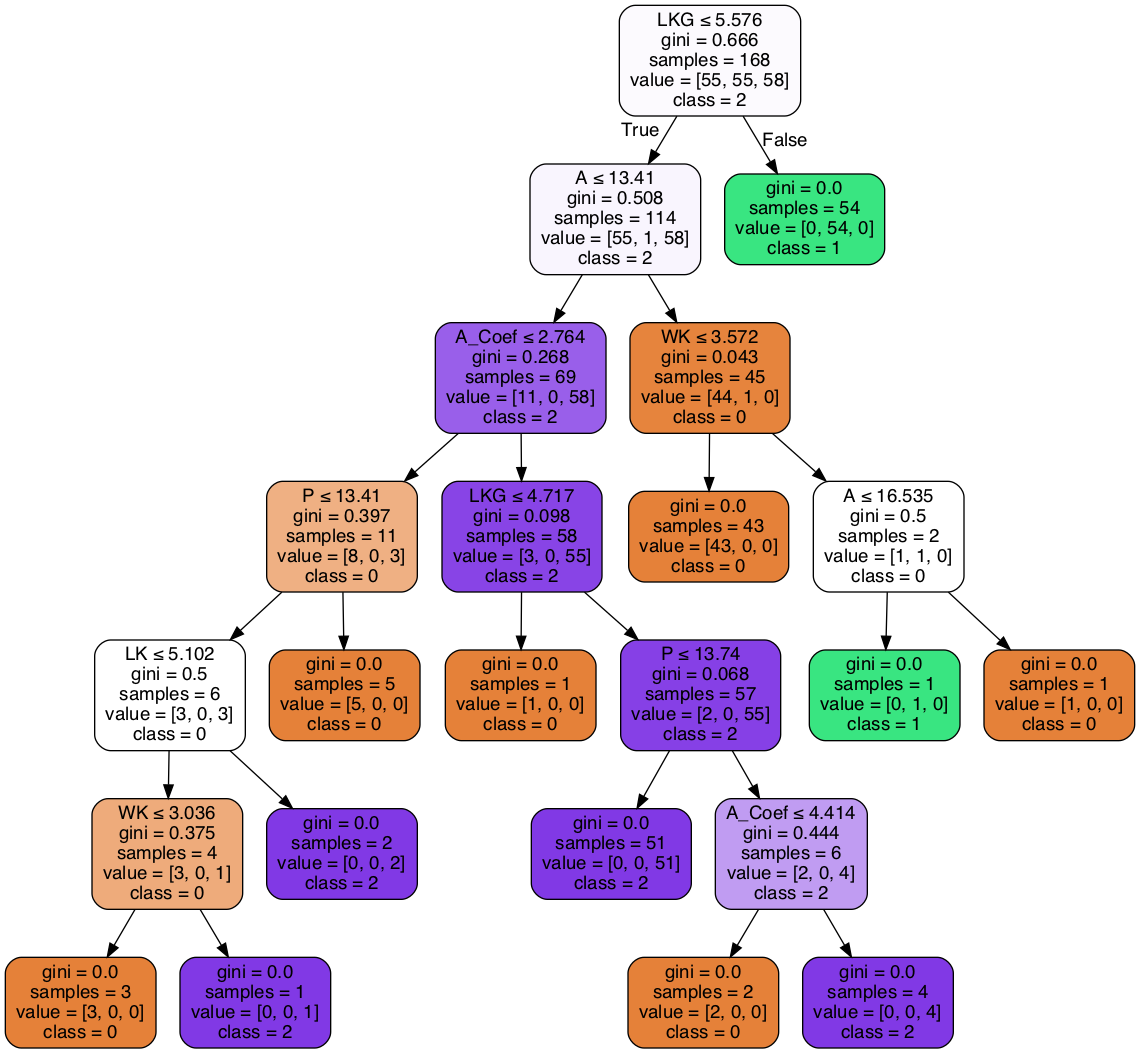

In [19]:
#creating the decision tree
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

feature_cols = ['A', 'P', 'C', 'LK', 'WK', 'A_Coef', 'LKG']

dot_data =StringIO()
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names= feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())